In [1]:
import pandas as pd

In [2]:
positives = pd.read_csv('positive_reviews.csv', encoding='utf-8')

In [3]:
negatives = pd.read_csv('negative_reviews.csv', encoding='utf-8')

In [4]:
positives

,Reviewer,Rating,Title,Body
0,Sadie Parker,VINE,a real opinion,I could sit here and write all about the spe...
1,David Fisher,5.0,This is NOT a Budget Laptop!,"This is the best laptop deal you can get, fu..."
2,Jason,VINE,Good choice for basic computing needs,A very reasonably priced laptop for basic co...
3,H. C. L. Brian,5.0,Won't be wrong at this price,A few months after the purchase....It is sti...
4,Mindy,VINE,Perfect for kids/teens and seniors,I got this for my ten year old son because i...
...,...,...,...,...
985,a.jm,5.0,One of the best values out there. Full linux s...,*UPDATE : The labtop completely died near en...
986,Callie,5.0,Games,It runs amazing
987,Sidd Finch,5.0,Excellent value! Just needs a couple inexpensi...,"Got this on sale for $270, which is an absol..."
988,Raging45,5.0,"Acer 5 Slim, review, upgrades, and Windows 10 ...","The Acer 5 slim is sleek, beautiful, durable..."


In [5]:
positives['Rating'].unique

<bound method Series.unique of 0      VINE
1       5.0
2      VINE
3       5.0
4      VINE
       ... 
985     5.0
986     5.0
987     5.0
988     5.0
989     5.0
Name: Rating, Length: 990, dtype: object>

In [6]:
# The model kept returning error upon fitting for places where positives['Rating'] == 'VINE' and where positives['RAting']==5.0
#I decided to change both to 4.0

In [7]:
def convertValue(state):
    if state == 'VINE':
        return 4.0
    else:
        return state

In [8]:
positives['Rating'] = positives['Rating'].apply(convertValue)

In [9]:
positives['Rating'] = positives['Rating'].astype(float)

In [10]:
positives['Rating']

0      4.0
1      5.0
2      4.0
3      5.0
4      4.0
      ... 
985    5.0
986    5.0
987    5.0
988    5.0
989    5.0
Name: Rating, Length: 990, dtype: float64

In [11]:
def changeReview (value):
    if value == 5.0:
        return 4.0
    elif value == 4.0:
        return 4.0
    else:
        value

In [12]:
positives['Rating'] = positives['Rating'].apply(changeReview)

In [13]:
positives['Rating'].astype(float)

0      4.0
1      4.0
2      4.0
3      4.0
4      4.0
      ... 
985    4.0
986    4.0
987    4.0
988    4.0
989    4.0
Name: Rating, Length: 990, dtype: float64

In [14]:
positives['Title'].unique

<bound method Series.unique of 0                                         a real opinion
1                           This is NOT a Budget Laptop!
2                  Good choice for basic computing needs
3                           Won't be wrong at this price
4                     Perfect for kids/teens and seniors
                             ...                        
985    One of the best values out there. Full linux s...
986                                                Games
987    Excellent value! Just needs a couple inexpensi...
988    Acer 5 Slim, review, upgrades, and Windows 10 ...
989                         Fantastic Deal for the Price
Name: Title, Length: 990, dtype: object>

In [15]:
negatives['Rating'].unique

<bound method Series.unique of 0     2.0
1     1.0
2     1.0
3     2.0
4     1.0
     ... 
82    2.0
83    1.0
84    3.0
85    3.0
86    1.0
Name: Rating, Length: 87, dtype: float64>

In [16]:
negatives['Title'].unique

<bound method Series.unique of 0     Audio-out jack doesn't work and the touch-pad ...
1     New Computer With 2 Major Problems - Acer Resp...
2     Defective Aspire 5 (Webcam), Extremely bad cus...
3                                    This one failed me
4                                 What a piece of crap.
                            ...                        
82                  Day 1: Touchpad starting to pop out
83                                   Junk- painful junk
84                                       Cheap finishes
85                  Comes with Non-Genuine Windows 10 S
86    Crashed 2x brand new acer support is 15-20 day...
Name: Title, Length: 87, dtype: object>

In [17]:
df = pd.concat([positives,negatives], axis=0, ignore_index=True)

In [18]:
df

,Reviewer,Rating,Title,Body
0,Sadie Parker,4.0,a real opinion,I could sit here and write all about the spe...
1,David Fisher,4.0,This is NOT a Budget Laptop!,"This is the best laptop deal you can get, fu..."
2,Jason,4.0,Good choice for basic computing needs,A very reasonably priced laptop for basic co...
3,H. C. L. Brian,4.0,Won't be wrong at this price,A few months after the purchase....It is sti...
4,Mindy,4.0,Perfect for kids/teens and seniors,I got this for my ten year old son because i...
...,...,...,...,...
1072,Jon,2.0,Day 1: Touchpad starting to pop out,I fired this thing up one evening and I was ...
1073,Hilton Keith,1.0,Junk- painful junk,"When it arrived, I spent a couple of hours s..."
1074,ATLshopper,3.0,Cheap finishes,I needed a laptop quick and for a low price....
1075,Chris Neuman,3.0,Comes with Non-Genuine Windows 10 S,The hardware is nice. I bought this for my s...


In [19]:
#shuffle the data 

In [20]:
from sklearn.utils import shuffle

In [21]:
df = shuffle(df)

In [22]:
df['Title'].nunique

<bound method IndexOpsMixin.nunique of 954                   Perfect for kids/teens and seniors
213                         Won't be wrong at this price
858    Acer 5 Slim, review, upgrades, and Windows 10 ...
71                          This is NOT a Budget Laptop!
632                Good choice for basic computing needs
                             ...                        
574                   Perfect for kids/teens and seniors
216                                                Games
234                   Perfect for kids/teens and seniors
370                                       a real opinion
339                         Fantastic Deal for the Price
Name: Title, Length: 1077, dtype: object>

In [23]:
#let's use the title column as features and the rating column as labels so that the model will use the title to predict the rating


In [24]:
features = df['Title']

In [25]:
labels = df['Rating'].astype(float)

In [26]:
features

954                   Perfect for kids/teens and seniors
213                         Won't be wrong at this price
858    Acer 5 Slim, review, upgrades, and Windows 10 ...
71                          This is NOT a Budget Laptop!
632                Good choice for basic computing needs
                             ...                        
574                   Perfect for kids/teens and seniors
216                                                Games
234                   Perfect for kids/teens and seniors
370                                       a real opinion
339                         Fantastic Deal for the Price
Name: Title, Length: 1077, dtype: object

In [27]:
labels

954    4.0
213    4.0
858    4.0
71     4.0
632    4.0
      ... 
574    4.0
216    4.0
234    4.0
370    4.0
339    4.0
Name: Rating, Length: 1077, dtype: float64

In [28]:
#let's change the values of the labels so that the model does not think they are continuous values

In [29]:
pd.Categorical(labels)

[4.0, 4.0, 4.0, 4.0, 4.0, ..., 4.0, 4.0, 4.0, 4.0, 4.0]
Length: 1077
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [30]:
#let's split our data into training and testing portions

In [31]:
training_size = 851

In [32]:
training_features = features[:training_size]

In [33]:
testing_features = features[training_size:]

In [34]:
training_labels = labels[:training_size]

In [35]:
testing_labels = labels[training_size:]

In [36]:
training_features.shape

(851,)

In [37]:
training_labels.shape

(851,)

In [38]:
testing_features.shape

(226,)

In [39]:
testing_labels.shape

(226,)

In [40]:
#process the data for the model

In [41]:
import tensorflow as tf

In [42]:
from tensorflow import keras

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
earlystop = EarlyStopping(monitor='val_loss', patience= 3)

In [45]:
tokenizer = Tokenizer(num_words= 276, oov_token='<OOV>')

In [46]:
tokenizer.fit_on_texts(training_features)

In [47]:
word_index = tokenizer.word_index

In [48]:
len(word_index)

263

In [49]:
training_sequences = tokenizer.texts_to_sequences(training_features)

In [50]:
training_padded = pad_sequences(training_sequences, padding='post')

In [51]:
testing_sequences = tokenizer.texts_to_sequences(testing_features)

In [52]:
testing_padded = pad_sequences(testing_sequences, padding='post')

In [53]:
training_padded.shape

(851, 17)

In [54]:
#building the model

In [55]:
from tensorflow.keras.models import Sequential

In [56]:
from tensorflow.keras.layers import Embedding,Dense, LSTM, Bidirectional

In [57]:
model =Sequential()

In [58]:
model.add(Embedding(276, 32, input_length =17 ))

In [59]:
model.add(Bidirectional(LSTM(32)))

In [60]:
model.add(Dense(32, activation='relu', kernel_regularizer= 'l2'))

In [61]:
model.add(Dense(16, activation = 'relu',kernel_regularizer= 'l2'))

In [62]:
model.add(Dense(8, activation = 'relu',kernel_regularizer= 'l2'))

In [63]:
model.add(Dense(8, activation = 'relu',kernel_regularizer= 'l2'))

In [64]:
model.add(Dense(5, activation='softmax'))

In [65]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [66]:
num_epochs = 45

In [67]:

history = model.fit(training_padded, training_labels, epochs= num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/45
27/27 - 25s - loss: 1.9566 - accuracy: 0.9095 - val_loss: 1.0754 - val_accuracy: 0.9292
Epoch 2/45
27/27 - 1s - loss: 1.0266 - accuracy: 0.9166 - val_loss: 0.8903 - val_accuracy: 0.9292
Epoch 3/45
27/27 - 1s - loss: 0.8627 - accuracy: 0.9166 - val_loss: 0.7233 - val_accuracy: 0.9292
Epoch 4/45
27/27 - 1s - loss: 0.6835 - accuracy: 0.9166 - val_loss: 0.5721 - val_accuracy: 0.9292
Epoch 5/45
27/27 - 1s - loss: 0.5030 - accuracy: 0.9166 - val_loss: 0.4514 - val_accuracy: 0.9292
Epoch 6/45
27/27 - 1s - loss: 0.4182 - accuracy: 0.9166 - val_loss: 0.3857 - val_accuracy: 0.9292
Epoch 7/45
27/27 - 1s - loss: 0.3674 - accuracy: 0.9166 - val_loss: 0.3420 - val_accuracy: 0.9292
Epoch 8/45
27/27 - 1s - loss: 0.3284 - accuracy: 0.9166 - val_loss: 0.3092 - val_accuracy: 0.9292
Epoch 9/45
27/27 - 1s - loss: 0.2971 - accuracy: 0.9166 - val_loss: 0.2840 - val_accuracy: 0.9292
Epoch 10/45
27/27 - 1s - loss: 0.2720 - accuracy: 0.9213 - val_loss: 0.2633 - val_accuracy: 0.9469
Epoch 11/45
27/27 

In [69]:
losses = pd.DataFrame(model.history.history)

In [70]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.956618,0.909518,1.075353,0.929204
1,1.026627,0.916569,0.890318,0.929204
2,0.862656,0.916569,0.723251,0.929204
3,0.683515,0.916569,0.572089,0.929204
4,0.502964,0.916569,0.451418,0.929204
5,0.418152,0.916569,0.385696,0.929204
6,0.367437,0.916569,0.341963,0.929204
7,0.328374,0.916569,0.309182,0.929204
8,0.297103,0.916569,0.283952,0.929204
9,0.272023,0.921269,0.263336,0.946903


In [82]:
accuracy = losses[['accuracy', 'val_accuracy']]

<AxesSubplot:>

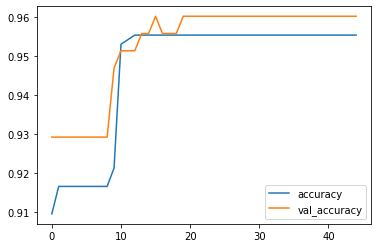

In [83]:
accuracy.plot()

In [80]:
loss = losses[['loss', 'val_loss']]

<AxesSubplot:>

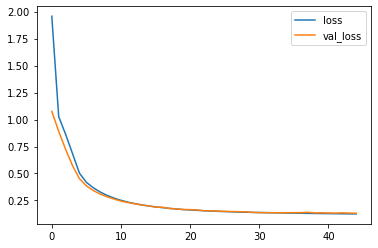

In [84]:
loss.plot()

In [85]:
model.save('sentiment_with_scrape.h5')